# Walmart Store Sales Forecasting:

###### Each store contains many departments, goal is to predict the sales for each department in each store

## Load Data Files

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
print('\tTrain File \n',train.head(5),'\nRow count ',train.shape,'\n Number of Missing values\n', train.isnull().sum())
print('\n\t Store File \n',stores.head(5),'\nRow count ',stores.shape,'\n Number of Missing values\n', stores.isnull().sum())
print('\n\t Features File \n',features.head(5),'\nRow count ',features.shape,'\n Number of Missing values\n', features.isnull().sum())

	Train File 
    Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False 
Row count  (421570, 5) 
 Number of Missing values
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

	 Store File 
    Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875 
Row count  (45, 3) 
 Number of Missing values
 Store    0
Type     0
Size     0
dtype: int64

	 Features File 
    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514

In [2]:
# drop IsHoliday column from features table
features = features.drop(columns='IsHoliday')
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


## Join Files
#### Merge Train and store file on Store column into a single dataframe. 

In [3]:
merge_train_store = pd.merge(train,stores,how='left',on='Store')

#### Final merge - merging on Store and Date columns

In [4]:
merged_files = pd.merge(merge_train_store,features,how='inner',on=['Store','Date'])
merged_files.head(50)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
5,1,6,2010-02-05,5749.03,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
6,1,7,2010-02-05,21084.08,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
7,1,8,2010-02-05,40129.01,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
8,1,9,2010-02-05,16930.99,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
9,1,10,2010-02-05,30721.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


## Data Visualization and Understanding

In [5]:
%matplotlib inline
###### Visualize Type and Size data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [6]:
# unique categories of stores type
store_type = stores.Type
set(store_type)

{'A', 'B', 'C'}

In [7]:
## are types and size related?
dict_type = {'A':1,'B':2,'C':3}
store_type = list(map(lambda k: dict_type[k],store_type))

store_size = stores.Size.tolist()

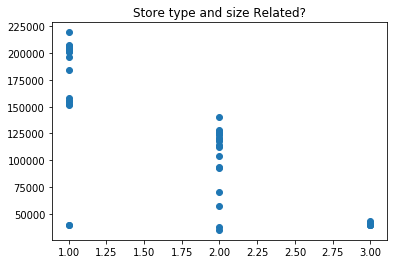

In [8]:
plt.title('Store type and size Related?')
plt.scatter(store_type,store_size)
plt.show()

In [9]:
### Store Type and Store Size seems related !!
stores[(stores['Type'] != 'C') & (stores['Size'] < 50000)]

,Store,Type,Size
2,3,B,37392
4,5,B,34875
32,33,A,39690
35,36,A,39910


##### It looks like type is category for store sizes. Only 2 'As' and 2 'Bs' type are <50000. It would be misrepresentation in data. We can safely drop type column from learning

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


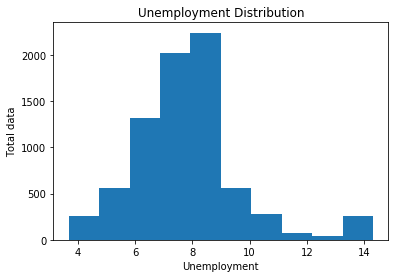

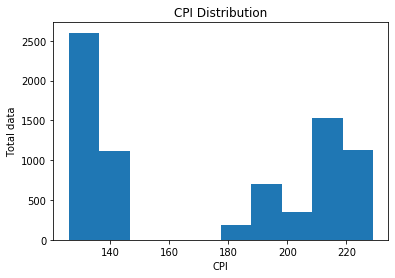

In [10]:
## whats the distribution of Unemployment and CPI
plt.figure('Unemployment Distribution')
plt.title('Unemployment Distribution')
plt.hist(features.Unemployment)
plt.xlabel('Unemployment')
plt.ylabel('Total data')
plt.show()

plt.figure('CPI Distribution')
plt.title('CPI Distribution')
plt.hist(features.CPI)
plt.xlabel('CPI')
plt.ylabel('Total data')
plt.show()

In [11]:
### Is any markdown specific to Holidays?
merged_files[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].groupby(merged_files['IsHoliday']).count()

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
IsHoliday,,,,,
False,138739,100526,125635,123997,139441
True,11942,10722,11456,10970,11991


In [12]:
### Are markdowns Week Specific?
week_markDown = merged_files[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].groupby(merged_files['Date']).count()
week_markDown

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,
2010-02-05,0,0,0,0,0
2010-02-12,0,0,0,0,0
2010-02-19,0,0,0,0,0
2010-02-26,0,0,0,0,0
2010-03-05,0,0,0,0,0
...,...,...,...,...,...
2012-09-28,2962,2294,2285,2616,2962
2012-10-05,2927,0,2808,2624,2976
2012-10-12,2990,0,2897,2582,2990


In [13]:
## We notice that there are 143rows/weeks of data, of which beginning weeks of year 2010 has no markdowns, we also know that there are missing values in markdown data. 
## Check for how many weeks markdown data is available.
availmarkDown = week_markDown[(week_markDown.MarkDown1 + week_markDown.MarkDown2 + week_markDown.MarkDown3 + week_markDown.MarkDown4 + week_markDown.MarkDown5 > 0)]
print('Total weeks for which Markdown data is available: ',len(availmarkDown))
availmarkDown.head(5),availmarkDown.tail(5)

Total weeks for which Markdown data is available:  51


(            MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5
 Date                                                             
 2011-11-11       2965       2965       2921       2577       2965
 2011-11-18       2961       2910       2718       2624       2961
 2011-11-25       2972       2472       2779       2491       3021
 2011-12-02       2950       2190       2994       2598       2994
 2011-12-09       2862       1918       3010       2608       3010,
             MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5
 Date                                                             
 2012-09-28       2962       2294       2285       2616       2962
 2012-10-05       2927          0       2808       2624       2976
 2012-10-12       2990          0       2897       2582       2990
 2012-10-19       2950          0       2799       2489       2950
 2012-10-26       2907       2959       2272       2426       2959)

In [14]:
# Plot weekly sales for holidays and regular dats
def PlotHolidaySales(figtitle,grouped_df):
    plt.figure(figtitle)
    plt.title('Weekly Sales for the Holiday, '+figtitle)
    iterator = grouped_df.groups.keys()
    for k in iterator:
        y = [l for l in grouped_df['Weekly_Sales'].get_group(k)]
        x = [k ==True]*len(y)
        plt.scatter(x,y)
    plt.legend(list(iterator))
    plt.show()

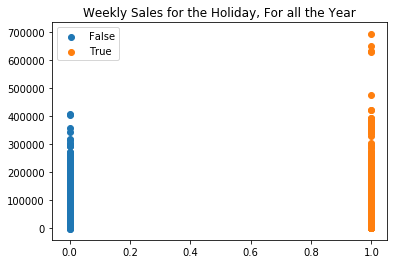

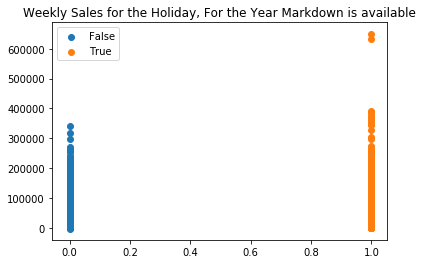

In [15]:
# General- for all the year including year with no markdown data
merged_files['Date'] = pd.to_datetime(merged_files['Date'])
general_df = merged_files[['Weekly_Sales']].groupby(merged_files['IsHoliday'])
PlotHolidaySales('For all the Year',general_df)


# For the one year markdown data that is available
mask = merged_files[(merged_files['Date'] > '2011-11-4')  & (merged_files['Date'] < '2012-11-4')]
masked_df = mask[['Weekly_Sales']].groupby(mask['IsHoliday'])
PlotHolidaySales('For the Year Markdown is available',masked_df)

##### Due to lack of data on MarkDown it would be difficult to point if Markdown is affecting the weekly sales in anyway

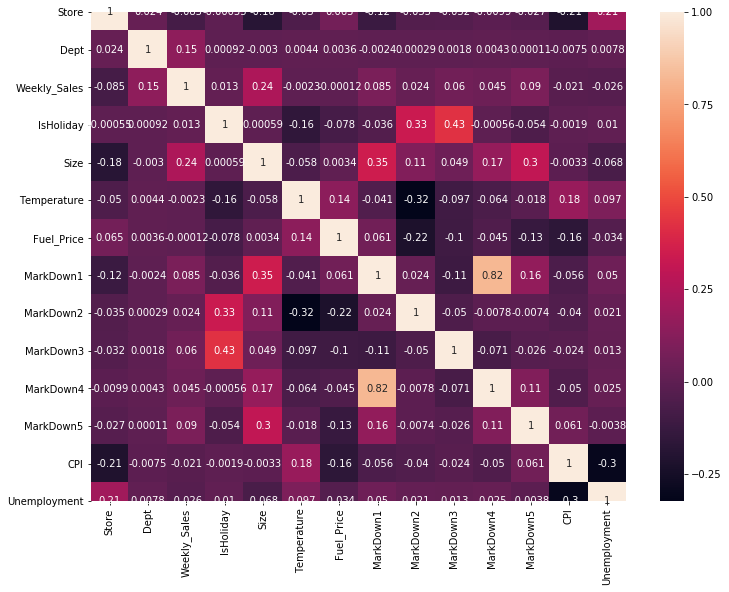

In [16]:
#### Correlation in Attributes 

## Plot heat map
fig = plt.figure('HeatMap',figsize=[12,9])
corr = merged_files.corr()
sns.heatmap(corr, annot=True)

#### Pattern/Trend in weekly sales in departments

In [ ]:
from random import randint
s,d = [randint(1,46) for i in range(3)],[randint(1,100) for i in range(3)]

for i in range(len(d)):
    dept_data = train[(train['Store']== s[i]) & (train['Dept'] == d[i])]
    x,y = pd.to_datetime(dept_data['Date']), dept_data['Weekly_Sales']
    if len(x) == 0: break
    plt.plot(x,y)
    plt.title('Weekly Sales for Store %s and its Dept %s'%(s[i],d[i]))
    plt.xticks(rotation = 'vertical')
    plt.show()

## Data Scaling and Engineering

#### Data Cleaning

In [18]:
print('Number of Missing values\n', merged_files.isnull().sum())

Number of Missing values
 Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64


In [19]:
merged_files[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = merged_files[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].replace(np.NaN,0)
merged_files[['Unemployment']] = merged_files[['Unemployment']].replace(np.NaN,np.nanmean(features.Unemployment))

merged_files['Year'] = pd.to_datetime(merged_files['Date']).dt.year
merged_files['Week'] = pd.to_datetime(merged_files['Date']).dt.week


merged_files = merged_files.drop(columns =['CPI','Type','Date'])

print('Number of Missing values\n', merged_files.isnull().sum())

Number of Missing values
 Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
Unemployment    0
Year            0
Week            0
dtype: int64


In [20]:
merged_files['IsHoliday'] = merged_files['IsHoliday'].astype(int)

In [21]:
# Independent and Dependent variables
y = merged_files.Weekly_Sales
X = merged_files.drop(columns = 'Weekly_Sales')
print(X.shape)
print(y.shape)

(421570, 14)
(421570,)


## Train Models

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Random Forest
def rfRegressor():
    return RandomForestRegressor(n_estimators =100,verbose =1)

# KNN    
def knnRegressor():
    return KNeighborsRegressor(n_neighbors = 10)

# SVM 
def svmRegressor():
    return SVR(kernel='rbf',cache_size = 2000)

# GB
def gbRegressor():
    return GradientBoostingRegressor(max_depth = 10)

In [23]:
def train(feature_vector,target,model): return model.fit(feature_vector,target)    

#def train_and_predict(feature_vector,target,test,model):
#    model.fit(feature_vector,target)
#    return model.predict(test)

In [24]:
def evalModel(predicted,actualTarget,weights): return mean_absolute_error(actualTarget,predicted,sample_weight = weights)

In [25]:
def rsquareEval(predicted,actualTarget,weights): return r2_score(actualTarget,predicted,sample_weight = weights)

In [26]:
def predictGap(predicted,actualTarget,isHoliday): 
        #df = pd.DataFrame({'Actual': actualTarget.flatten(), 'Predicted': predicted.flatten(), 'IsHoliday': isHoliday})
        df = pd.DataFrame({'Actual': actualTarget, 'Predicted': predicted, 'IsHoliday': isHoliday})
        return(df)

In [27]:
from sklearn.model_selection import train_test_split
def dataSplit(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)
    print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
    weights = X_test['IsHoliday'].replace(True, 5).replace(False, 1)
    return (X_train, X_test, y_train, y_test, weights)

In [28]:
from sklearn.model_selection import train_test_split
def trainModels(X_train, X_test, y_train, y_test,weights):
    # RF
    #pred_rf = train_and_predict(X_train,y_train,X_test,rfRegressor())
    pred_rf = train(X_train,y_train,rfRegressor()).predict(X_test)
    rf_mse = evalModel(y_test,pred_rf,weights)
    rf_r2 = rsquareEval(y_test,pred_rf,weights)
    print('RF score: ',rf_mse, 'RF RSquare: ',rf_r2)
    rf_gap_df = predictGap(pred_rf,y_test,X_test['IsHoliday'].values)


    # KNN
    #pred_knn = train_and_predict(X_train,y_train,X_test,knnRegressor())
    pred_knn = train(X_train,y_train,knnRegressor()).predict(X_test)
    knn_mse = evalModel(y_test,pred_knn,weights)
    knn_r2 = rsquareEval(y_test,pred_knn,weights)
    print('KNN score: ',knn_mse, 'KNN RSquare: ',knn_r2)
    knn_gap_df = predictGap(y_test,pred_knn,X_test.IsHoliday)
    
    # SVM - SVM training is taking very long, so skipping SVM from model training
    #pred_svm = train_and_predict(X_train,y_train,X_test,svmRegressor())
    #svm_score = evalModel(pred_svm,y_test,weights)
    #print('SVM score: ',svm_score)
    #svm_Perc, svm_df = predictGap(pred_svm,y_test,X_test.IsHoliday)
    
    # GB
    #pred_gb = train_and_predict(X_train,y_train,X_test,gbRegressor())
    pred_gb = train(X_train,y_train,gbRegressor()).predict(X_test)
    gb_mse = evalModel(y_test,pred_gb,weights)
    gb_r2 = rsquareEval(y_test,pred_gb,weights)
    print('GB score: ',gb_mse, 'GB RSquare: ',gb_r2)
    gb_gap_df = predictGap(pred_gb,y_test,X_test.IsHoliday)
    
    return (rf_gap_df,knn_gap_df,gb_gap_df)

In [29]:
# Independent and Dependent variables
y = merged_files.Weekly_Sales
X = merged_files.drop(columns = 'Weekly_Sales')

## Data Scaling and Normalization

In [30]:
# shallow copy
X_scale = X.copy()
cols_to_Scale = ['Size','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Unemployment']

# Apply Min Max Scaler
X_scale[cols_to_Scale] = X_scale[cols_to_Scale].apply(lambda v: (v - v.min()) / (v.max() - v.min()))
print(X_scale)

        Store  Dept  IsHoliday      Size  Temperature  Fuel_Price  MarkDown1  \
0           1     1          0  0.630267     0.434149    0.050100   0.000000   
1           1     2          0  0.630267     0.434149    0.050100   0.000000   
2           1     3          0  0.630267     0.434149    0.050100   0.000000   
3           1     4          0  0.630267     0.434149    0.050100   0.000000   
4           1     5          0  0.630267     0.434149    0.050100   0.000000   
...       ...   ...        ...       ...          ...         ...        ...   
421565     45    93          0  0.451136     0.595988    0.706413   0.045336   
421566     45    94          0  0.451136     0.595988    0.706413   0.045336   
421567     45    95          0  0.451136     0.595988    0.706413   0.045336   
421568     45    97          0  0.451136     0.595988    0.706413   0.045336   
421569     45    98          0  0.451136     0.595988    0.706413   0.045336   

        MarkDown2  MarkDown3  MarkDown4

## Train and Predict

In [32]:
print('Train Models with UnNormalized data')
X_train, X_test, y_train, y_test, weights = dataSplit(X,y)
rf_df,knn_df,gb_df = trainModels(X_train, X_test, y_train, y_test, weights)

print('Train Models with Normalized data')
X_train, X_test, y_train, y_test, weights = dataSplit(X_scale,y)
rf_dfscale,knn_dfscale,gb_dfscale = trainModels(X_train, X_test, y_train, y_test, weights)

Train Models with UnNormalized data
(316177, 14) (316177,) (105393, 14) (105393,)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.1s finished


RF score:  1668.8703453074197 RF RSquare:  0.9635835516746437
KNN score:  11133.175661399848 KNN RSquare:  -0.6071190452527373
GB score:  2166.176040276868 GB RSquare:  0.9616363168826962
Train Models with Normalized data
(316177, 14) (316177,) (105393, 14) (105393,)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.9s finished


RF score:  1669.5574554623272 RF RSquare:  0.96342546652624
KNN score:  7704.741239852835 KNN RSquare:  0.2946610409562922
GB score:  2130.6854716013936 GB RSquare:  0.961594910025991


## Eval on how models did for IsHoliday = True 

In [38]:
## Plotting the actual and prediction for holiday events
def plotIsHolidayPred(rfdf,knndf,gbdf):
    rf = rfdf[(rfdf['IsHoliday'] == 1)]
    knn = knndf[(knndf['IsHoliday'] == 1)]
    gb = gbdf[(gbdf['IsHoliday'] == 1)]
    df = pd.DataFrame({'Actual':rf['Actual'],'RF':rf['Predicted'],'KNN':knn['Predicted'],'GB':gb['Predicted']})
    
    pts = len(df['Actual'])
    plot_head = df.head(pts)
    x = list(range(pts))
    plotResult(x,plot_head,'Plotting for data')
    
    #plot_tails = df.tail(pts)
    #plotResult(x,plot_tails,'Plotting for last few data')
    
def plotResult(x,plot_data,title):
    plt.figure(figsize=(20,10))
    plt.title(title)
    plt.plot(x,plot_data['Actual'], marker = '8')
    plt.plot(x,plot_data['RF'])
    plt.plot(x,plot_data['KNN'])
    plt.plot(x,plot_data['GB'])
    plt.legend(labels = ['Actual','RF','KNN','GB'])
    plt.show()

#### Eval on models trained on unscaled data, prediction for IsHoliday = true

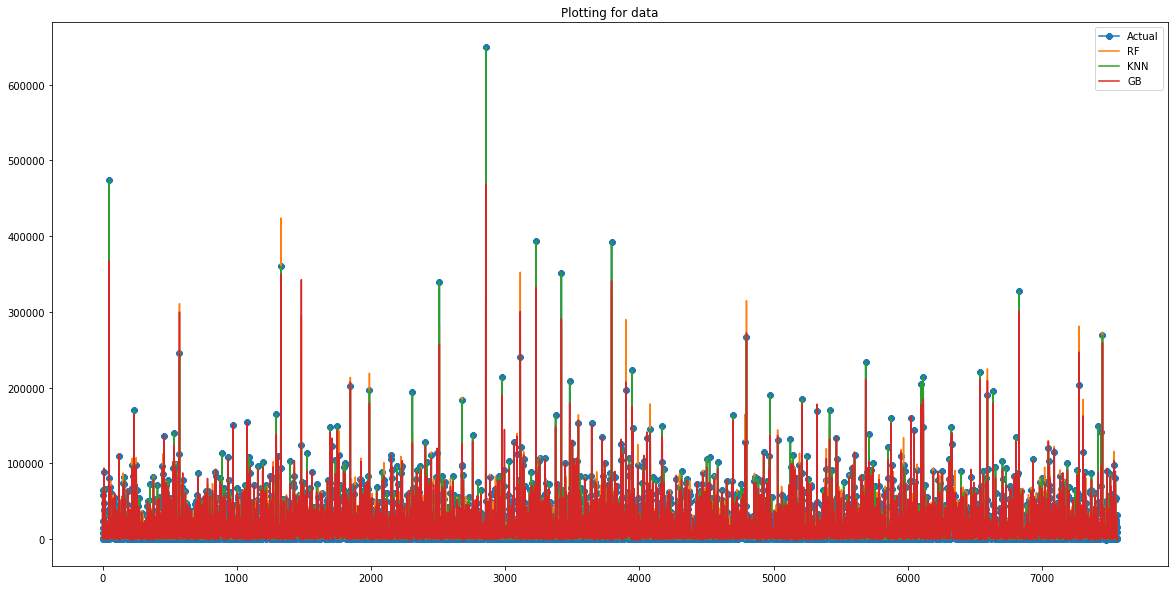

In [39]:
plotIsHolidayPred(rf_df,knn_df,gb_df)

#### Eval on models trained on Normalized data, prediction for IsHoliday = true

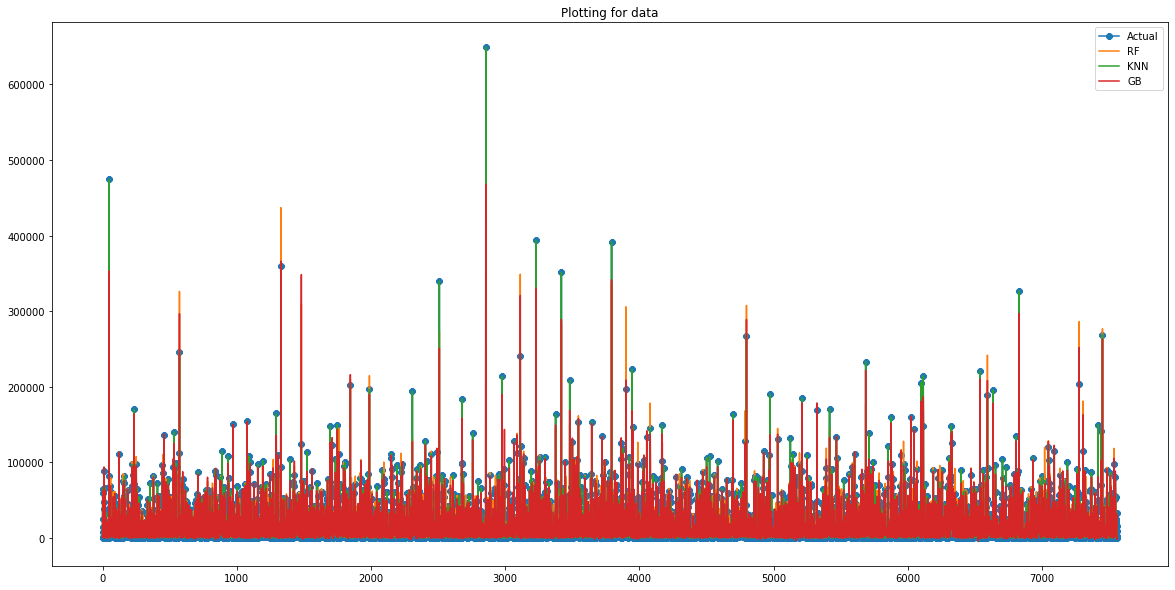

In [40]:
plotIsHolidayPred(rf_dfscale,knn_dfscale,gb_dfscale)

## Best Model

In [42]:
## Based on Score evaluation and Rsquared Eval - Best Model is 
best_model = rfRegressor()
#train the best model with all the training data
main_model = train(X,y,best_model)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.1min finished


## Test Model

In [43]:
test = pd.read_csv('test.csv')
print('Test File: ',test.shape)

test = test.merge(stores, how ='left').merge(features, how='left')
test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].replace(np.NaN,0)
test = test.fillna(0)

test = test.drop(columns =['CPI','Type'])

test['IsHoliday'] = test['IsHoliday'].astype(int)
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Week'] = pd.to_datetime(test['Date']).dt.week
test_date = test['Date']
test = test.drop(columns =['Date'])

test
#print('Number of Missing values\n', test_data.isnull().sum())
#print('\tTest File \n',test.head(5),'\nRow count ',test.shape,'\n Number of Missing values\n', test.isnull().sum())

Test File:  (115064, 4)


,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Year,Week
0,1,1,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,6.573,2012,44
1,1,1,0,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,6.573,2012,45
2,1,1,0,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,6.573,2012,46
3,1,1,1,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,6.573,2012,47
4,1,1,0,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,6.573,2012,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,0,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000,2013,26
115060,45,98,0,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000,2013,27
115061,45,98,0,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000,2013,28
115062,45,98,0,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000,2013,29


In [44]:
# Prediction using Best Model
test_prediction = main_model.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished


In [45]:
submission_file = pd.DataFrame(test_prediction, columns= ['Weekly_Sales'])
submission_file['Id'] = test['Store'].astype(str) + '_' +  test['Dept'].astype(str) + '_' +  test_date.astype(str)
submission_file = submission_file[['Id','Weekly_Sales']]

In [46]:
## Write the prediction to a submission_file.csv
submission_file.to_csv('submission_file.csv',index = False)